# Example 1: Iris Dataset (A)
In this example we will learn how to create a <strong> Machine Learning Model</strong>.<br>
We will work on the <strong> Iris Dataset </strong>.<br>
This dataset contains informations of 3 flowers that belong to the Iris species.<br>
<p style="text-align:center;"><img src="Example1/iris_image.png"></p>

### NOTE
To execute a cell, press <strong>Shift+Enter</strong>

## 1. Importing Libraries
We will need 
- numpy (NumPy) for arrays
- pandas (Pandas) for data manipulation
- matplotlib for visualisation
- sklearn (Scikit-Learn) for creating, fitting and evaluating the model
- seaborn (Seaborn), which gives a simpler syntax for visualisation

 

In [6]:
#Every single line comment in python starts with #
import numpy as np
#sklearn.datasets contains some predefined datasets
import sklearn.datasets as ds
#pandas is used for data manipulation
import pandas as pd
#matplotlib.pyplot is used for visualisation
import matplotlib.pyplot as plt
#seaborn is a user friendly library for visualisation built on top of matplotlib
import seaborn as sns
#we will use a Classification Model called LogisticRegression
from sklearn.linear_model import LogisticRegression
#we will split the data using train_test_split
from sklearn.model_selection import train_test_split
#OPTIONAL: This is for evaluating a classification model
from sklearn.metrics import confusion_matrix

## 2. Preprocessing: Loading Iris Dataset
We will Load here The Iris Dataset <br>
We will then Load the $X$ values and $y$ values<br>
- $X$ is a matrix where each row describes a particular flower, and each column describes a particular feature, $X$ is called the input set
- The correspending $y$ value of the $X$ row defines the flower group,$y$ is called the output set
- A feature is some given characteristic used to predict 

$\implies$ We want to predict the flower group from its characteristics. 

In other words, based on the <strong>information learnt</strong> from $X$ and $y$, and given some <strong>new input data </strong> $X'$ we want to <strong>predict</strong> $y'$

In [7]:
#Load the IRIS dataset
iris_dataset=ds.load_iris()
#X is a DataFrame (Matrix/2D array) containing the features of the iris data 
X=pd.DataFrame(iris_dataset["data"])
#y contains the numeric value/label of each iris flower, respecting the order 
#y is a vector (Series/1D array)
y=pd.Series(iris_dataset["target"],name ="Target")
#y_name contains the true name of each iris flower
y_name=pd.Series(iris_dataset["target_names"],name="Species")
#Feature Names and removing ' (cm)'
feature_names = [feature_name[:-5] for feature_name in iris_dataset["feature_names"]]
X.columns=feature_names

### Viewing a sample of $X$
Feel free to change the number of samples

In [3]:
X.sample(5)

,sepal length,sepal width,petal length,petal width
85,6.0,3.4,4.5,1.6
62,6.0,2.2,4.0,1.0
106,4.9,2.5,4.5,1.7
125,7.2,3.2,6.0,1.8
4,5.0,3.6,1.4,0.2


### Viewing the first elements of $y$
Feel free to change the number below

In [5]:
y.sample(5)

31    0
33    0
2     0
16    0
95    1
Name: Target, dtype: int32

### Viewing <code>y_name</code>
y_label here defines a mapping between the numerical value and the flower species

In [7]:
y_name

0        setosa
1    versicolor
2     virginica
Name: Species, dtype: object

## 3. Analysing Data
### Understanding Features
<p style="text-align:center;"><img src="Example1/iris_description.jpg"></p>

### Merging Tables
To Analyse data, sometimes, it maybe simpler to combine the data to one table 

In [8]:
#This is an example of functional programming
#The first line combines The Input Data & The (Numerical) Ouput Data into a new Table (DataFrame)
#The second line adds a new column to the DataFrame with the Target Label
#The '\' is just used to expand the following long instruction:
#pd.concat([X,y],axis=1).join(y_name,on="Target")
#to two lines 
U=pd.concat([X,y],axis=1)\
.join(y_name,on="Target")
#To see the last 10 examples
U.tail(10)

,sepal length,sepal width,petal length,petal width,Target,Species
140,6.7,3.1,5.6,2.4,2,virginica
141,6.9,3.1,5.1,2.3,2,virginica
142,5.8,2.7,5.1,1.9,2,virginica
143,6.8,3.2,5.9,2.3,2,virginica
144,6.7,3.3,5.7,2.5,2,virginica
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


### Some Plottings

Text(0.5, 1.0, 'Plot $1$: Relation Between Sepal Length & Sepal Width in cm')

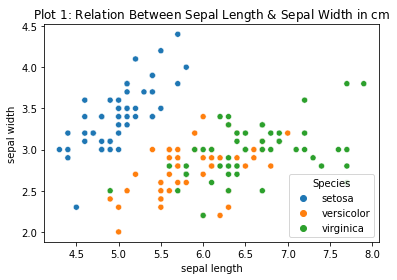

In [7]:
#Plot 1
ax=sns.scatterplot(x="sepal length",y="sepal width",hue="Species",data=U)
ax.set_title("Plot $1$: Relation Between Sepal Length & Sepal Width in cm")

Text(0.5, 1.0, 'Plot $2$: Relation Between Sepal Length & Petal Width in cm')

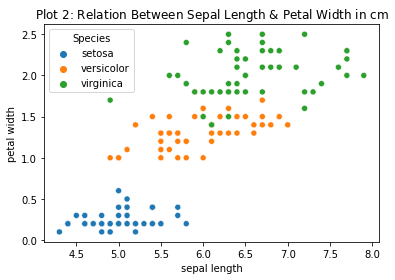

In [8]:
#Plot 2
ax=sns.scatterplot(x="sepal length",y="petal width",hue="Species",data=U)
ax.set_title("Plot $2$: Relation Between Sepal Length & Petal Width in cm")

### Observation
We see that the second plot gives us a pattern on how the <strong>flower types are seperated</strong>
### To DO
You can explore other relations by changing the features name in the code below

In [9]:
#This is a list of the feature names
feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [12]:
try:
    ax=sns.scatterplot(x="feature name 1",y="feature name 2",hue="Species",data=U)
    ax.set_title("Congratulations on your first Plot!")
#This is an example of exception Handling in Python
except:
    print("Verify the features' names!")

Verify the features' names!


## 4. Model Selection
### Creating Train & Test Sets
We will Create a training set that is used to fit our model<br>
The training data is a random sample of size $80\%$ of the iris dataset

Feel Free to change the <code>train_size</code>, but note that it should be between $0.5$ and $0.9$ 

In [9]:
#This is an example of multiple return values in Python
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8)

### Creating & Fitting Model
Here we will create a LogisticRegression model and we will fit it against the <strong>training data</strong><br>
Feel free to change the constant $C>0,$ and see how it affects accuarcy

In [5]:
#Creating Model
model = LogisticRegression(C=1,max_iter=1000)
#Fitting Model
#A semi-colon ';' is used to suppress output, Try to remove it and see the difference
model.fit(X_train,y_train);

NameError: name 'LogisticRegression' is not defined

## 5. Testing Model
We will evaluate the accuarcy of our model with the <strong>testing data</strong>

Our model has an accuarcy of 100.000%


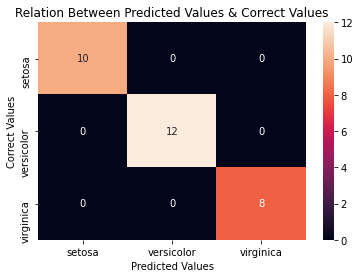

In [19]:
#This is an example of string formatting in Python
print("Our model has an accuarcy of {:.3f}%".format(100*model.score(X_test,y_test)))
#OPTIONAL: uncomment the following lines to see details about model prediction
#h_map=sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True,xticklabels=y_name,yticklabels=y_name)
#h_map.set_title("Relation Between Predicted Values & Correct Values")
#h_map.set_ylabel("Correct Values")
#h_map.set_xlabel("Predicted Values");

## 5. Model Deployment
Now our model is ready for use 😃<br>
Predicting a value

# Example 1: Iris Dataset, but more deep (B)
In this section we will create a <strong> Deep Learning model </strong>
## 1. Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 2. Designing a Neural Network

In [159]:
#input layer
inputs = tf.keras.Input(shape=(4,))
#hidden layer
hidden = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(inputs)
#output layer
outputs = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(hidden)
deep_model = tf.keras.Model(inputs=inputs, outputs=outputs)

## 3. Compiling Design & Fitting the Model
A Keras Model will memorize <strong> its progress.</strong><br>
You can train it more then once

In [164]:
deep_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
deep_model.fit(X_train,y_train,epochs=1000,verbose=0)

# 4. Evaluating 
## 4.1 Accuarcy
Each time you retrain the model,its accuarcy will keep improving

In [165]:
deep_model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 132ms/step - loss: 0.6395 - accuracy: 0.9000


[0.6395093202590942, 0.8999999761581421]

## 4.2 Accuarcy Improvement per Epoch
We can even visualise how model accuarcy improve every <code>epoch_lim</code><br>
Note that every time you execute, you will find a <strong>different curve</strong>, this is explained by the fact a deep learning algorithm always has <strong>a random</strong> starting point.<br>
Furthermore, in general, it may <strong>fail</strong> to spot the optimal model, it will only return a "locally" optimal model.<br>

<AxesSubplot:title={'center':'Accuarcy evolution per epoch'}, xlabel='Epoch', ylabel='Accaurcy'>

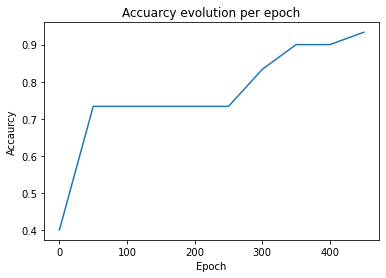

In [170]:
def plot_accaurcy(X_train,y_train,epoch_lim,n):
    inputs = tf.keras.Input(shape=(4,))
    outputs = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(inputs)
    deep_model = tf.keras.Model(inputs=inputs, outputs=outputs)
    deep_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    E=range(0,epoch_lim*n,epoch_lim)
    Acc=np.zeros(n)
    for i in range(n):
        deep_model.fit(X_train,y_train,epochs=epoch_lim,verbose=0)
        _,Acc[i]=deep_model.evaluate(X_test,y_test,verbose=0)
    ax=sns.lineplot(x=E,y=Acc)
    ax.set_title("Accuarcy evolution per epoch")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accaurcy")
    return ax
plot_accaurcy(X_train,y_train,50,10)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])